# Clustering - DBSCAN
- Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
- Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
- Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [1]:
# from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
import env

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

# 1
Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [2]:
# acquire 
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/grocery_db'
query = '''
SELECT * from grocery_customers
'''
df = pd.read_sql(query, url)
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# select features to cluster
# Cluster on all or a selected subset of features
delicassen_frozen_fresh = df[["Delicassen", "Frozen", "Fresh"]]

In [4]:
# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(delicassen_frozen_fresh)

# Use the scaler
delicassen_frozen_fresh = scaler.transform(delicassen_frozen_fresh)
delicassen_frozen_fresh

array([[0.02784731, 0.0031063 , 0.11294004],
       [0.03698373, 0.02854842, 0.06289903],
       [0.16355861, 0.03911643, 0.05662161],
       ...,
       [0.03888194, 0.00677142, 0.1295431 ],
       [0.04426366, 0.01664914, 0.091727  ],
       [0.00102211, 0.00065742, 0.02482434]])

In [5]:
# Make the object
dbsc = DBSCAN(eps = .10, min_samples = 20)

# Fit the object
dbsc.fit(delicassen_frozen_fresh)

DBSCAN(eps=0.1, min_samples=20)

In [6]:
# Now, let's add the scaled value columns back onto the dataframe
columns = ["Delicassen", "Frozen", "Fresh"]
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(delicassen_frozen_fresh, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Delicassen,Scaled_Frozen,Scaled_Fresh
0,0,2,3,12669,9656,7561,214,2674,1338,0.027847,0.003106,0.112940
1,1,2,3,7057,9810,9568,1762,3293,1776,0.036984,0.028548,0.062899
2,2,2,3,6353,8808,7684,2405,3516,7844,0.163559,0.039116,0.056622
3,3,1,3,13265,1196,4221,6404,507,1788,0.037234,0.104842,0.118254
4,4,2,3,22615,5410,7198,3915,1777,5185,0.108093,0.063934,0.201626


In [7]:
#Next, we can extract our cluster labels and outliers to plot our results.
# Assign the cluster labels
# Recall that cluster labels don't have inherent meaning
# DBSCAN makes a cluster called -1 that contains the "noise" or outliers
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    422
-1     18
Name: labels, dtype: int64

In [8]:
df.head()

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Delicassen,Scaled_Frozen,Scaled_Fresh,labels
0,0,2,3,12669,9656,7561,214,2674,1338,0.027847,0.003106,0.112940,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.036984,0.028548,0.062899,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.163559,0.039116,0.056622,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.037234,0.104842,0.118254,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.108093,0.063934,0.201626,0


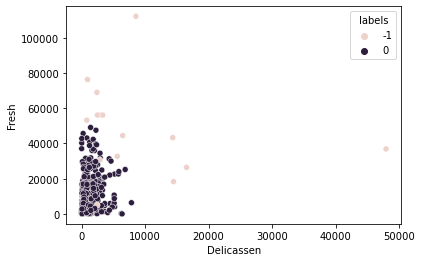

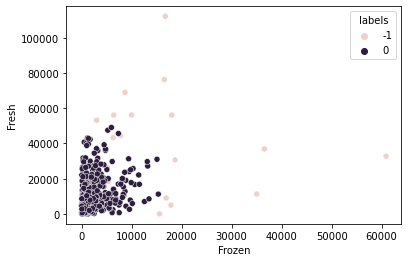

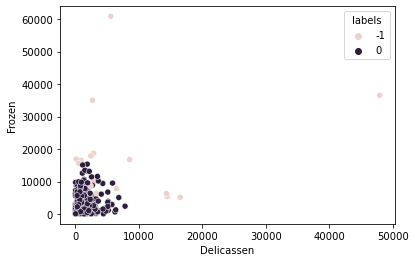

In [9]:
sns.scatterplot(df.Delicassen, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Frozen, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Delicassen, df.Frozen, hue=df.labels)
plt.show()

Text(0.5, 0, 'Fresh')

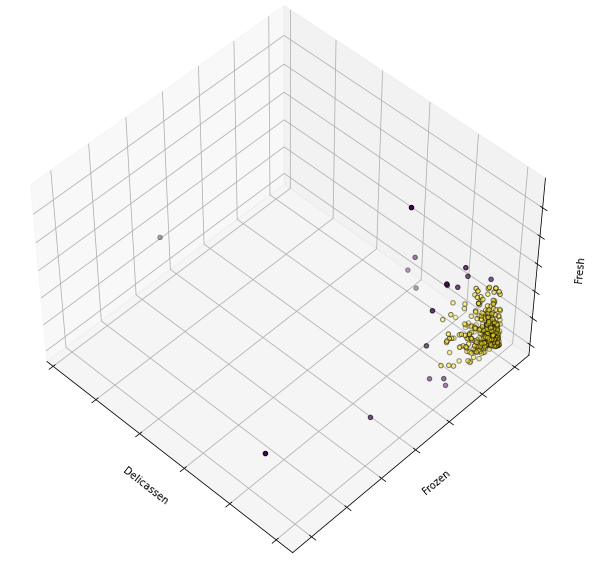

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Delicassen, df.Frozen, df.Fresh,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Delicassen')
ax.set_ylabel('Frozen')
ax.set_zlabel('Fresh')
